# In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.


In [1]:
#Hint:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
#Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','Species'])

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
feature = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = iris.loc[:, feature].values  
y = iris.loc[:, ['Species']].values

In [5]:
#iris dataset has 4 columns which require 4d plot so we will reduce its dimensions using PCA(Principle component analysis)
pca = decomposition.PCA(n_components=3)
pc = pca.fit_transform(x)
p_df = pd.DataFrame(data = pc, columns = ['D1', 'D2', 'D3'])
p_df

,D1,D2,D3
0,-2.684207,0.326607,-0.021512
1,-2.715391,-0.169557,-0.203521
2,-2.889820,-0.137346,0.024709
3,-2.746437,-0.311124,0.037672
4,-2.728593,0.333925,0.096230
...,...,...,...
145,1.944017,0.187415,0.179303
146,1.525664,-0.375021,-0.120636
147,1.764046,0.078519,0.130784
148,1.901629,0.115877,0.722874


In [6]:
final_df = pd.concat([p_df, iris[['Species']]], axis = 1)

In [7]:
final_df

,D1,D2,D3,Species
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
...,...,...,...,...
145,1.944017,0.187415,0.179303,Iris-virginica
146,1.525664,-0.375021,-0.120636,Iris-virginica
147,1.764046,0.078519,0.130784,Iris-virginica
148,1.901629,0.115877,0.722874,Iris-virginica


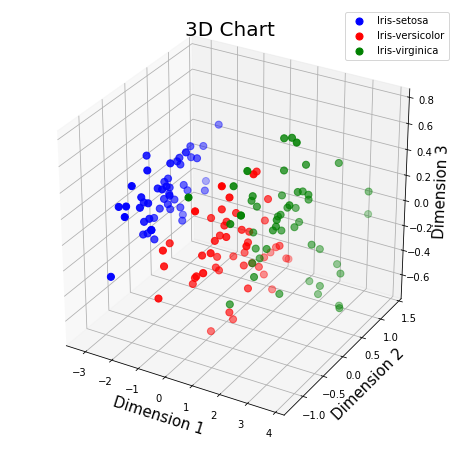

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_zlabel('Dimension 3', fontsize = 15)
ax.set_title('3D Chart', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['blue', 'red', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Species'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'D1']
               , final_df.loc[indicesToKeep, 'D2']
               , final_df.loc[indicesToKeep, 'D3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()